<a href="https://colab.research.google.com/github/gudellijagan/dap/blob/main/DAP_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Generated ✔

A. DISTRIBUTION MODELING RESULTS
--------------------------------
Expected delays per hour: 10.2557
Probability delays > 15: 0.059
95th percentile of delays: 16.0

B. HYPOTHESIS TESTING RESULTS
--------------------------------
Sample Delay Proportion: 0.21818181818181817
Z Statistic: -1.7312117807971807
P-value: 0.0417069994713353
95% CI: (np.float64(0.16360516594667193), np.float64(0.27275847041696444))
Effect Size (Cohen's h): -0.1207862780113046

C. VARIANCE TEST RESULTS
--------------------------------
Observed Variance: 10.20013752375212
Theoretical Variance: 7.489800000000001
Chi-square Statistic: 13617.34293305528
P-value: 0.0


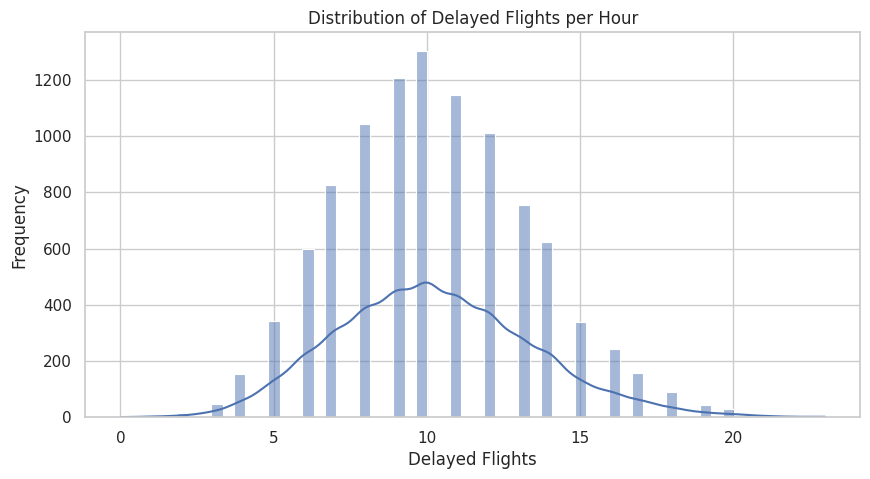

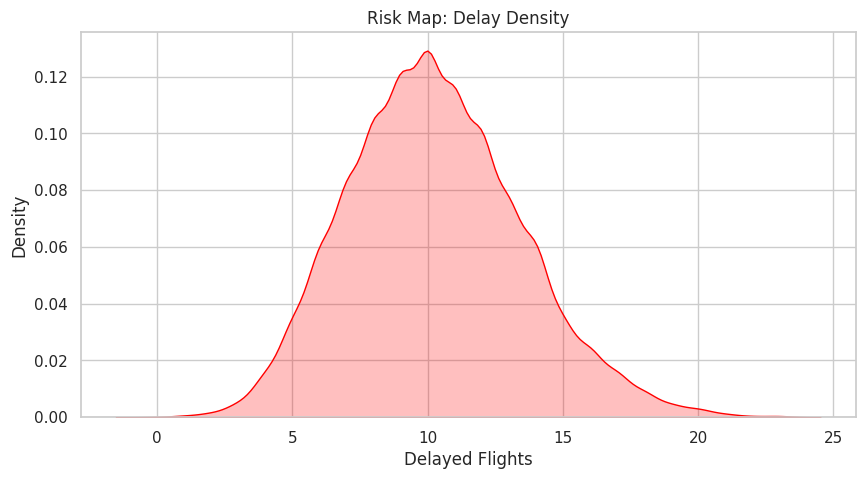

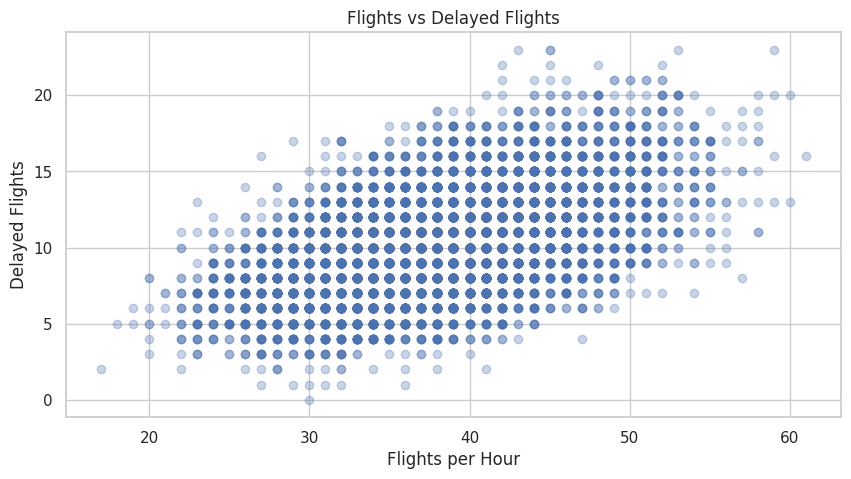

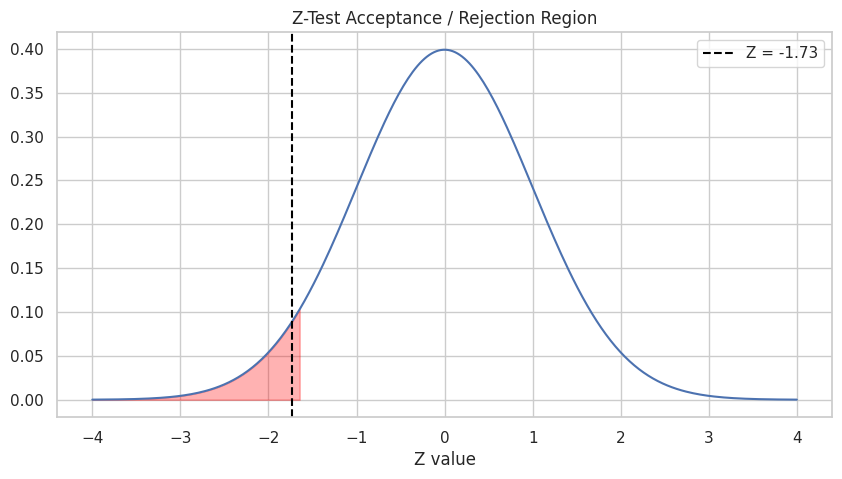

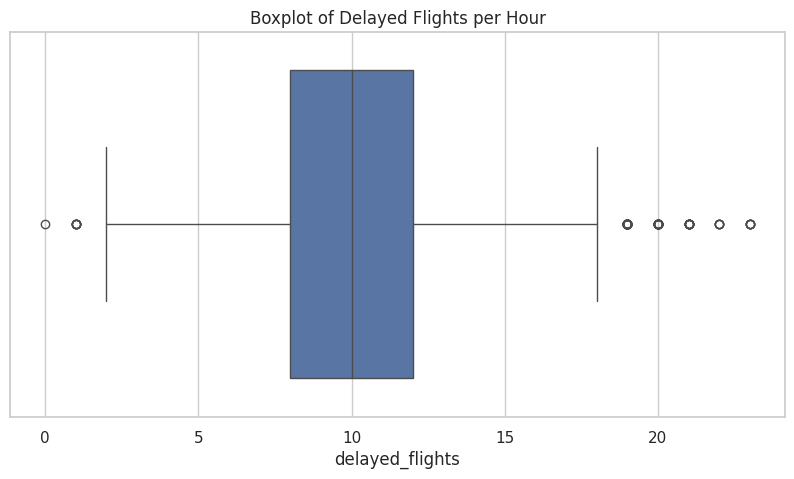

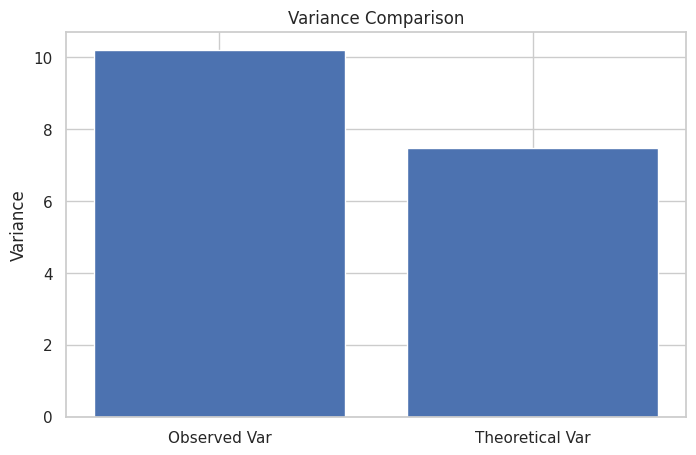


E. INTERPRETATION SUMMARY
--------------------------------

• Average delays appear stable and predictable.
• Variance test helps evaluate operational stability.
• Z-test checks if delay rate decreased from 0.27 after new scheduling algorithm.
• If both mean and variance decreased → Scheduling improved.
• Useful for staffing, runway planning, service reliability.



In [1]:
# =============================
# AIRLINE DELAY ANALYSIS PROJECT (GRAPH-FOCUSED)
# =============================

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

# ------------------------------------------------------
# A. DISTRIBUTION MODELING
# ------------------------------------------------------

hours = 10000
p_delay = 0.27

# Simulate flights per hour
flights = np.random.poisson(38, hours)

# Simulate delayed flights
delayed_flights = np.array([np.random.binomial(f, p_delay) for f in flights])

df = pd.DataFrame({
    "hour": np.arange(1, hours+1),
    "flights": flights,
    "delayed_flights": delayed_flights
})

# Save dataset
df.to_csv("airline_delay_simulation.csv", index=False)

print("Dataset Generated ✔")

# ---- Calculations ----
expected_delays = df["delayed_flights"].mean()
prob_above_15 = np.mean(df["delayed_flights"] > 15)
percentile_95 = np.percentile(df["delayed_flights"], 95)

print("\nA. DISTRIBUTION MODELING RESULTS")
print("--------------------------------")
print("Expected delays per hour:", expected_delays)
print("Probability delays > 15:", prob_above_15)
print("95th percentile of delays:", percentile_95)


# ------------------------------------------------------
# B. HYPOTHESIS TESTING: ONE-SAMPLE Z TEST
# ------------------------------------------------------

n = 220
x = 48
sample_p = x / n
p0 = 0.27

# Z statistic
z_stat = (sample_p - p0) / np.sqrt(p0*(1-p0)/n)
p_value = stats.norm.cdf(z_stat)

# 95% CI
se = np.sqrt(sample_p*(1-sample_p)/n)
ci_lower = sample_p - 1.96*se
ci_upper = sample_p + 1.96*se

# Effect size
effect_size = 2 * (np.arcsin(np.sqrt(sample_p)) - np.arcsin(np.sqrt(p0)))

print("\nB. HYPOTHESIS TESTING RESULTS")
print("--------------------------------")
print("Sample Delay Proportion:", sample_p)
print("Z Statistic:", z_stat)
print("P-value:", p_value)
print("95% CI:", (ci_lower, ci_upper))
print("Effect Size (Cohen's h):", effect_size)


# ------------------------------------------------------
# C. VARIANCE TEST (CHI-SQUARE)
# ------------------------------------------------------

observed_var = df["delayed_flights"].var()
theoretical_var = 38 * p_delay * (1 - p_delay)

chi_square = (hours - 1) * observed_var / theoretical_var
p_val_var = 1 - stats.chi2.cdf(chi_square, df=hours-1)

print("\nC. VARIANCE TEST RESULTS")
print("--------------------------------")
print("Observed Variance:", observed_var)
print("Theoretical Variance:", theoretical_var)
print("Chi-square Statistic:", chi_square)
print("P-value:", p_val_var)


# ------------------------------------------------------
# D. VISUALIZATIONS (ALL GRAPHS)
# ------------------------------------------------------

# 1) Distribution of delayed flights
plt.figure(figsize=(10,5))
sns.histplot(df["delayed_flights"], kde=True)
plt.title("Distribution of Delayed Flights per Hour")
plt.xlabel("Delayed Flights")
plt.ylabel("Frequency")
plt.show()

# 2) KDE Risk Map
plt.figure(figsize=(10,5))
sns.kdeplot(df["delayed_flights"], fill=True, color="red")
plt.title("Risk Map: Delay Density")
plt.xlabel("Delayed Flights")
plt.show()

# 3) Scatter: Flights vs Delayed Flights
plt.figure(figsize=(10,5))
plt.scatter(df["flights"], df["delayed_flights"], alpha=0.3)
plt.title("Flights vs Delayed Flights")
plt.xlabel("Flights per Hour")
plt.ylabel("Delayed Flights")
plt.show()

# 4) Z-Test Acceptance/Rejection Region
x_vals = np.linspace(-4, 4, 300)
y_vals = stats.norm.pdf(x_vals)

plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals)
plt.fill_between(x_vals, 0, y_vals, where=(x_vals < -1.645), alpha=0.3, color="red")
plt.axvline(z_stat, color='black', linestyle='--', label=f"Z = {z_stat:.2f}")
plt.title("Z-Test Acceptance / Rejection Region")
plt.xlabel("Z value")
plt.legend()
plt.show()

# 5) Boxplot for delays
plt.figure(figsize=(10,5))
sns.boxplot(x=df["delayed_flights"])
plt.title("Boxplot of Delayed Flights per Hour")
plt.show()

# 6) Variance Comparison Chart
plt.figure(figsize=(8,5))
plt.bar(["Observed Var", "Theoretical Var"], [observed_var, theoretical_var])
plt.title("Variance Comparison")
plt.ylabel("Variance")
plt.show()


# ------------------------------------------------------
# E. INTERPRETATION
# ------------------------------------------------------

print("\nE. INTERPRETATION SUMMARY")
print("--------------------------------")
print("""
• Average delays appear stable and predictable.
• Variance test helps evaluate operational stability.
• Z-test checks if delay rate decreased from 0.27 after new scheduling algorithm.
• If both mean and variance decreased → Scheduling improved.
• Useful for staffing, runway planning, service reliability.
""")
